# 다중 회귀 분석

# step 0 패키지불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse

%matplotlib inline

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler


# step 1 데이터 구성하기

In [2]:
df = pd.read_csv("체질검사.csv", engine='python')
df.head(20)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4
5,24.2,40,202.25,70.00,38.5,106.5,100.9,106.2,63.5,39.9,22.6,35.1,30.6,19.0
6,23.3,52,167.00,67.75,37.5,102.7,91.0,98.9,57.1,36.7,22.3,31.6,27.5,17.9
7,26.0,54,230.00,72.25,42.5,119.9,110.4,105.5,64.2,42.7,27.0,38.4,32.0,19.6
8,9.0,47,184.25,74.50,37.3,99.6,88.8,101.4,57.4,39.6,24.6,30.3,27.9,17.8
9,4.0,47,127.50,66.75,34.0,83.4,70.4,87.2,50.6,34.4,21.9,26.8,25.8,16.8


## bmi 계산

weight 와 bmi에서 이상치가 존재함을 알 수 있다. 때문에 이를 제거하였다.


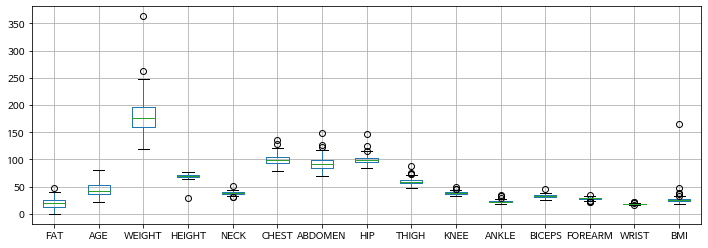

In [3]:
bmi = []
for i in range(len(df)):
    weight = df.loc[i]['WEIGHT'] * 0.45
    height = df.loc[i]['HEIGHT'] * 0.0254
    cal_bmi = weight / (height * height)
    bmi.append(cal_bmi)

df['BMI'] = bmi
df.boxplot(figsize=(12,4))

print("weight 와 bmi에서 이상치가 존재함을 알 수 있다. 때문에 이를 제거하였다.")

# 이상치제거

이상치가 제거된 모습이다.


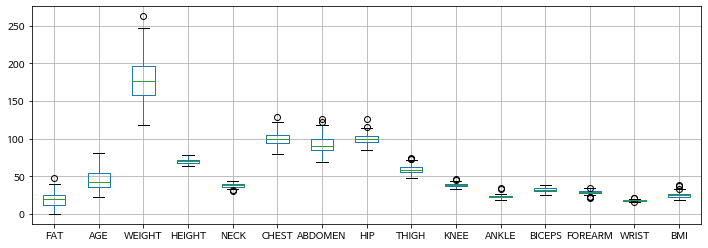

In [4]:
df = df[df['BMI'] < 163]
df = df[df['WEIGHT'] < 350]
df.boxplot(figsize=(12,4))
print("이상치가 제거된 모습이다.")

# step 2 변수간의 경향성 파악 - 그래프 분석

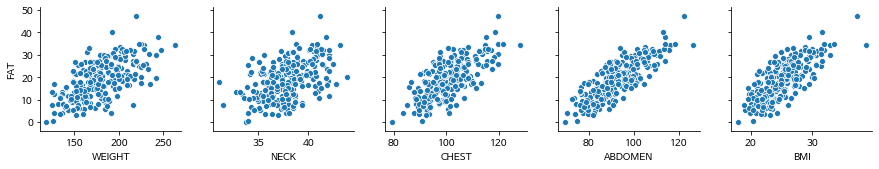

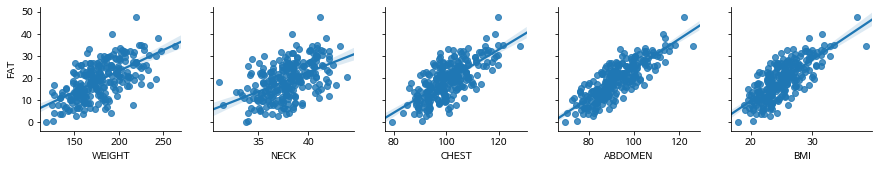

In [5]:
sns.pairplot(df,y_vars='FAT', x_vars=['WEIGHT','NECK','CHEST','ABDOMEN','BMI'])
sns.pairplot(df,y_vars='FAT', x_vars=['WEIGHT','NECK','CHEST','ABDOMEN','BMI'], kind='reg')



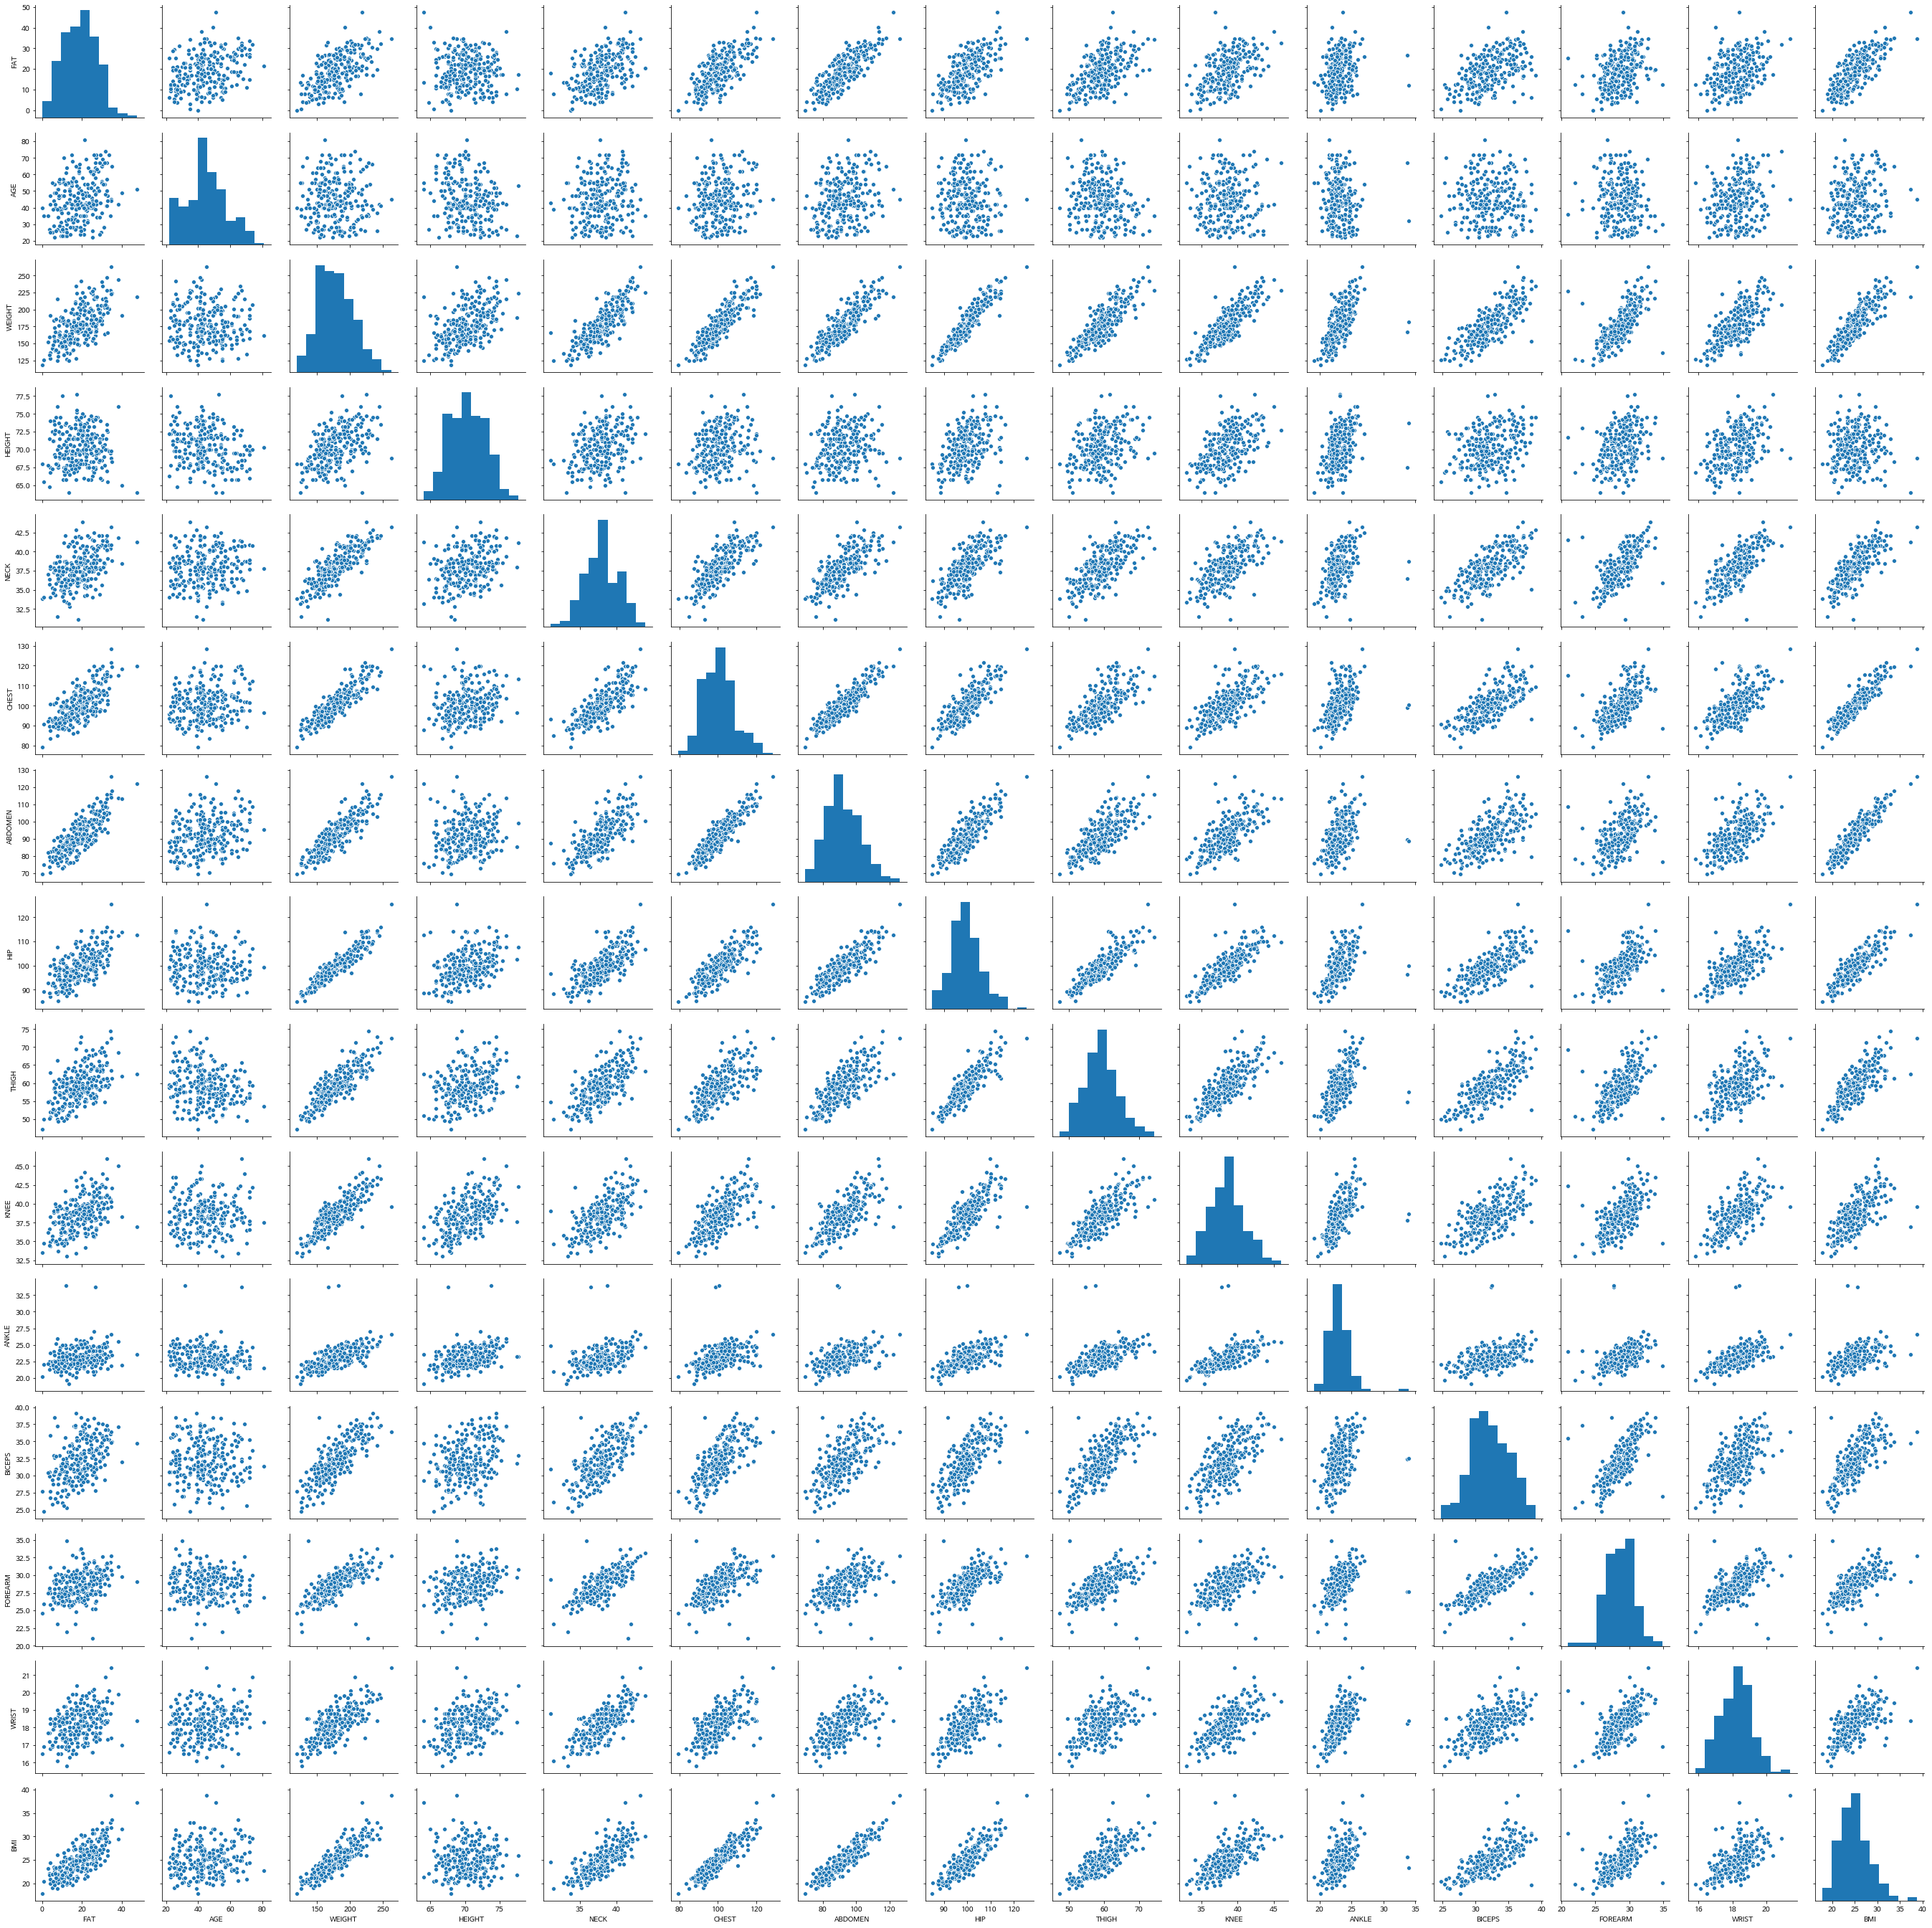

In [6]:
sns.pairplot(df)

In [7]:
df.corr().round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
FAT,1.000,0.295,0.617,-0.029,0.489,0.701,0.824,0.633,0.549,0.492,0.245,0.482,0.365,0.339,0.745
AGE,0.295,1.000,-0.016,-0.246,0.119,0.182,0.243,-0.058,-0.216,0.017,-0.110,-0.044,-0.085,0.218,0.124
WEIGHT,0.617,-0.016,1.000,0.513,0.810,0.891,0.874,0.933,0.852,0.843,0.581,0.785,0.683,0.725,0.867
HEIGHT,-0.029,-0.246,0.513,1.000,0.325,0.224,0.187,0.397,0.350,0.513,0.395,0.319,0.322,0.397,0.022
NECK,0.489,0.119,0.810,0.325,1.000,0.769,0.728,0.708,0.669,0.648,0.434,0.709,0.661,0.731,0.752
CHEST,0.701,0.182,0.891,0.224,0.769,1.000,0.910,0.825,0.708,0.698,0.447,0.707,0.599,0.644,0.911
ABDOMEN,0.824,0.243,0.874,0.187,0.728,0.910,1.000,0.861,0.737,0.710,0.407,0.656,0.530,0.602,0.914
HIP,0.633,-0.058,0.933,0.397,0.708,0.825,0.861,1.000,0.881,0.809,0.521,0.722,0.603,0.626,0.861
THIGH,0.549,-0.216,0.852,0.350,0.669,0.708,0.737,0.881,1.000,0.777,0.504,0.744,0.604,0.544,0.787
KNEE,0.492,0.017,0.843,0.513,0.648,0.698,0.710,0.809,0.777,1.000,0.585,0.654,0.579,0.656,0.679


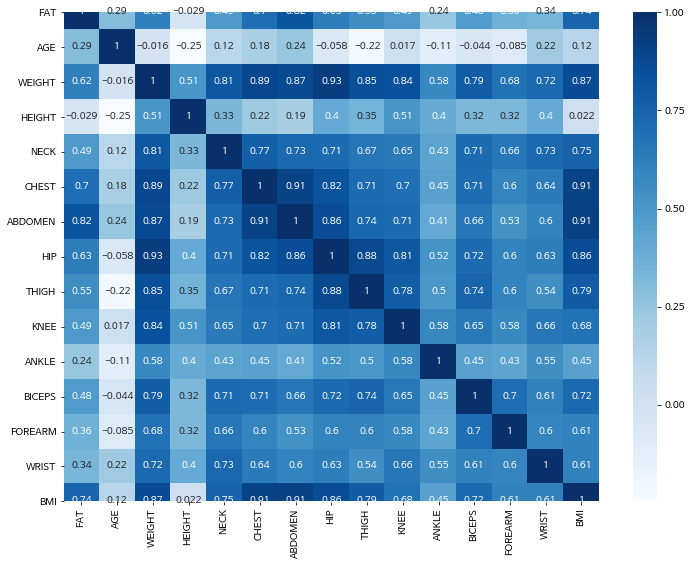

In [8]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr().round(3), annot=True, cmap='Blues')


# step 3 회귀모델생성: 설명변수 전체

In [9]:
model =smf.ols(formula='FAT~AGE + WEIGHT + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + KNEE+ \
                        ANKLE + BICEPS + FOREARM + WRIST + BMI', data = df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     51.82
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           1.18e-63
Time:                        22:02:59   Log-Likelihood:                -707.13
No. Observations:                 250   AIC:                             1444.
Df Residuals:                     235   BIC:                             1497.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -106.8540     55.404     -1.929      0.0

# 회귀 모델 생성: 설명변수 간의 다중공선성 확인

In [10]:
df_x = df.drop("FAT", axis=1)
df_x_const = add_constant(df_x)
df_vif = pd.DataFrame()
df_vif['variable'] = df_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_x_const.values, i) for i in range(df_x_const.shape[1])]
df_vif.sort_values('VIF', inplace=True)
df_vif.round(3)



/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
10,ANKLE,1.829
1,AGE,2.290
12,FOREARM,2.448
13,WRIST,3.273
11,BICEPS,3.411
4,NECK,3.979
9,KNEE,4.538
8,THIGH,7.169
5,CHEST,10.950
6,ABDOMEN,12.344


# 회귀모델생성 : 설명변수 다중공선성 처리
## weight제외 -> ViF 수치가 244.827로 제일 높으므로

In [11]:
model =smf.ols(formula='FAT~AGE + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + KNEE+ \
                        ANKLE + BICEPS + FOREARM + WRIST + BMI', data = df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     54.73
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           1.24e-63
Time:                        22:02:59   Log-Likelihood:                -709.37
No. Observations:                 250   AIC:                             1447.
Df Residuals:                     236   BIC:                             1496.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8773      8.918      0.659      0.5

In [12]:
df_x = df.drop(["FAT", "WEIGHT"], axis=1)
df_x_const = add_constant(df_x)
df_vif = pd.DataFrame()
df_vif['variable'] = df_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_x_const.values, i) for i in range(df_x_const.shape[1])]
df_vif.sort_values('VIF', inplace=True)
df_vif.round(3)



,variable,VIF
9,ANKLE,1.828
1,AGE,2.288
11,FOREARM,2.444
12,WRIST,3.270
10,BICEPS,3.375
3,NECK,3.931
8,KNEE,4.380
2,HEIGHT,6.007
7,THIGH,7.061
4,CHEST,10.840


### BMI 역시 ViF가 35.132이므로 제외한다

In [13]:
model =smf.ols(formula='FAT~AGE + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + KNEE+ \
                        ANKLE + BICEPS + FOREARM + WRIST', data = df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     59.38
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           1.97e-64
Time:                        22:02:59   Log-Likelihood:                -709.62
No. Observations:                 250   AIC:                             1445.
Df Residuals:                     237   BIC:                             1491.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.3858      8.632      0.856      0.3

In [14]:
df_x = df.drop(["FAT", "WEIGHT", 'BMI'], axis=1)
df_x_const = add_constant(df_x)
df_vif = pd.DataFrame()
df_vif['variable'] = df_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_x_const.values, i) for i in range(df_x_const.shape[1])]
df_vif.sort_values('VIF', inplace=True)
df_vif.round(3)



,variable,VIF
9,ANKLE,1.751
2,HEIGHT,1.792
1,AGE,2.184
11,FOREARM,2.387
12,WRIST,3.166
10,BICEPS,3.276
3,NECK,3.723
8,KNEE,4.367
7,THIGH,6.900
4,CHEST,7.488


### 보이는 표와 같이 다중공선성 문제를 해결하였다.

# step 4 후진제거법을 이용한 변수 선택

In [15]:
df_y = df['FAT']
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=5).fit(df_x, df_y)
rfe.support_
selected_cols = df_x.columns[rfe.support_]
removed_cols = df_x.columns[~rfe.support_]

print("Selected Variable : ", selected_cols)
print("Removed Variable : ", removed_cols)



Selected Variable :  Index(['HEIGHT', 'NECK', 'ABDOMEN', 'FOREARM', 'WRIST'], dtype='object')
Removed Variable :  Index(['AGE', 'CHEST', 'HIP', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS'], dtype='object')


## 후진제거법을 이용한 변수 선택 및 모델 생성

In [68]:
rfe_model = smf.ols(formula='FAT~ HEIGHT + NECK + ABDOMEN + FOREARM + WRIST', data = df)
rfe_result = rfe_model.fit()
print(rfe_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     136.4
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           1.42e-68
Time:                        22:44:23   Log-Likelihood:                -716.41
No. Observations:                 250   AIC:                             1445.
Df Residuals:                     244   BIC:                             1466.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.4550      7.911      1.195      0.2

## 후진제거법을 이용한 변수 선택 - 선택된 설명변수의 다중공선성 재진단

In [17]:
df_x_rfe = df_x[selected_cols]
df_x_rfe_const = add_constant(df_x_rfe)
df_vif_rfe = pd.DataFrame()
df_vif_rfe['variable'] = df_x_rfe_const.columns
df_vif_rfe["VIF"] = [variance_inflation_factor(df_x_rfe_const.values, i) for i in range(df_x_rfe_const.shape[1])]
df_vif_rfe.sort_values('VIF', inplace=True)
df_vif_rfe.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
1,HEIGHT,1.222
4,FOREARM,1.900
3,ABDOMEN,2.223
5,WRIST,2.440
2,NECK,3.359
0,const,845.781


# step 5 결론 도출

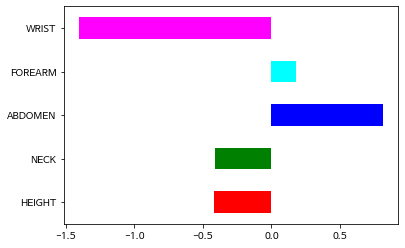

In [18]:
ref_coef = pd.DataFrame({"Coef" :rfe_result.params.values[1:]}, index= selected_cols)
ref_coef.plot.barh(y='Coef', legend=False,color=['red','green','blue','cyan','magenta'])

# 표준화 진행

In [60]:
scaler = StandardScaler()
cols = df_x.columns
np_scaled = scaler.fit_transform(df_x)
df_scaled = pd.DataFrame(np_scaled, columns=cols)
df.reset_index(inplace=True)
df_scaled['FAT'] = df['FAT']
reg_model_scaled = smf.ols(formula='FAT~ HEIGHT + NECK + ABDOMEN + FOREARM + WRIST', data = df_scaled)
reg_result_scaled = reg_model_scaled.fit()
print(reg_result_scaled.summary())


                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     136.4
Date:                Tue, 04 Feb 2020   Prob (F-statistic):           1.42e-68
Time:                        22:29:16   Log-Likelihood:                -716.41
No. Observations:                 250   AIC:                             1445.
Df Residuals:                     244   BIC:                             1466.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.0316      0.272     69.965      0.0

# 표준화하기전

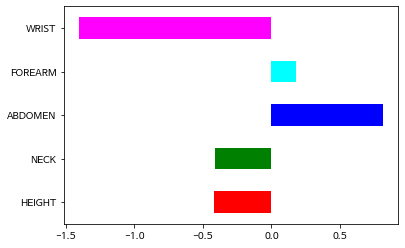

In [63]:
ref_coef = pd.DataFrame({"Coef" :rfe_result.params.values[1:]}, index= selected_cols)
ref_coef.plot.barh(y='Coef', legend=False,color=['red','green','blue','cyan','magenta'])

# 표준화 한 이후

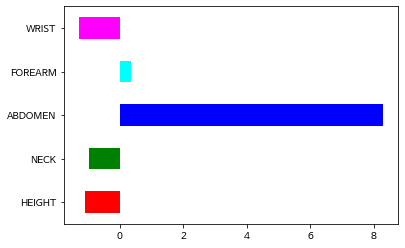

In [61]:
ref_coef2 = pd.DataFrame({"Coef" :reg_result_scaled.params.values[1:]}, index= selected_cols)
ref_coef2.plot.barh(y='Coef', legend=False,color=['red','green','blue','cyan','magenta'])

표준화 하기전에는 WRIST의 중요도가 가장 높고 그 뒤를 ABDOMEN이지만, 표준화 한 이후에는 ABDOMEN의 중요도가 다른 변수들에 비해 월등하게 높음을 볼 수 있다. 

# 결론

## 표준화 하기전 모델의 회귀식
### y = 9.4550 - 0.4189*HEIGHT - 0.4135*NECK + 0.8134*ABDOMEN + 0.1821*FOREARM - 1.4035* WRIST
## 표준화 한 후 모델의 회귀식
### y = 19.0316- 1.0939*HEIGHT - 0.9453*NECK + 8.2864*ABDOMEN + 0.3687*FOREARM - 1.2802* WRIST

체질비만도(FAT)를 결정하는 중요요소는 ABDOMEN(복부둘레), 손목두께(WRIST), 키(HEIGHT), 목둘레(NECK), 전완두께(FOREARM)순이며,   
복부둘레(ABDOMEN)이 커질수록 체질 비만도(FAT)가 커지고, 손목두께(WRIST)가 얇을수록 체질 비만도(FAT)가 커진다. 

# 잔차의 정규성 검정

NormaltestResult(statistic=5.576934257426042, pvalue=0.061515436927647556)

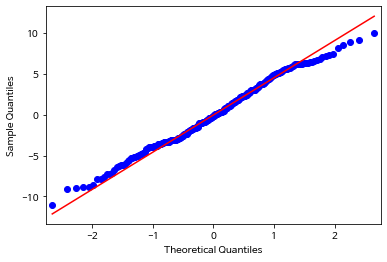

In [83]:
qqplot(result.resid, line='q')
from statsmodels.stats.stattools import omni_normtest
omni_normtest(result.resid, axis=0)


In [86]:
print("p-value값이 0.05이상이므로 정규성을 만족하는 것을 알 수 있다. ")

p-value값이 0.05이상이므로 정규성을 만족하는 것을 알 수 있다. 


# 잔차의 등분산성, 독립성 검정

더빈왓슨값이 2.077이므로 독립성이 있다고 볼 수있으며, 0을 기준으로 랜덤하게 분포되어 있으므로 등분산성을 만족한다고 볼 수있다.


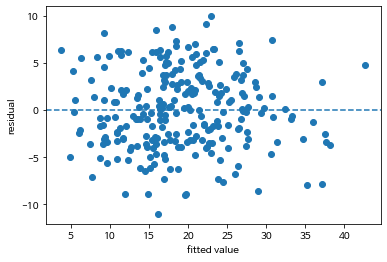

In [87]:
plt.scatter(result.fittedvalues, result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y=0, linestyle="--")
print("더빈왓슨값이 2.077이므로 독립성이 있다고 볼 수있으며, 0을 기준으로 랜덤하게 분포되어 있으므로 등분산성을 만족한다고 볼 수있다.")